# Imports and setting up viz

NB : conda env1 on Mac, lam1env on spirit (Python3.12)

In [1]:
import numpy as np
import netCDF4 as nc
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
from cycler import cycler
import cartopy
import cartopy.crs as ccrs
import matplotlib as mpl
from matplotlib.colors import ListedColormap
%matplotlib inline

/home/ptiengou/.conda/envs/lam1env/lib/python3.12/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [2]:
plt.rcParams.update(
        {
            'figure.facecolor': 'white',
            'axes.facecolor': 'white',
            'font.size': 12,
            'figure.dpi': 72.0,
            'xtick.direction': 'in',
            'ytick.direction': 'in',
            'xtick.major.size': 5.0,
            'xtick.minor.size': 2.5,
            'ytick.major.size': 5.0,
            'ytick.minor.size': 2.5,
            'xtick.minor.visible': True,
            'ytick.minor.visible': True,
            'axes.grid': True,
            'axes.titlesize': 'larger',
            'axes.labelsize': 'larger',
            'grid.color': 'dimgray',
            'grid.linestyle': '-',
            'grid.alpha': 0.3,
            'axes.prop_cycle': cycler(
                color=[
                    '#0C5DA5',
                    '#FF9500',
                    '#00B945',
                    '#FF2C00',
                    '#845B97',
                    '#474747',
                    '#9E9E9E',
                ]
            ) * cycler(alpha=[0.8]),
            'scatter.marker': 'x',
            'lines.linewidth': 1.0,
        })

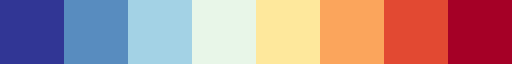

In [3]:
#define centered colorbar
emb = ListedColormap(mpl.colormaps['RdYlBu_r'](np.linspace(0, 1, 8)))
emb

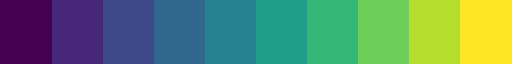

In [4]:
#define progressive colorbar
myvir = ListedColormap(mpl.colormaps['viridis'](np.linspace(0, 1, 10)))
myvir

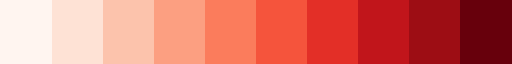

In [5]:
#define progressive colorbar
reds = ListedColormap(mpl.colormaps['Reds'](np.linspace(0, 1, 10)))
reds

# Load files
File to evaluate the behaviour of native routing compared to standard.

First working on the same topographic grid (0.5°).

4 files are considered : one from the standard routing simulation, three from the native routing simulation (sechiba_history, diag_routing, diag_routing_r)

In [6]:
# sim_dir='test_sim85'
# sim_dir='tcst7.1'
# simirr_dir='tcst7irr0.6'
sim_dir='../LAM/sim14/SRF/MO'
simirr_dir='../LAM/sim15/SRF/MO'

In [7]:
#open netcdf files for native routing on ORC grid
# filename = '../sim_outputs/{}/*history.nc'.format(sim_dir)
# natORC = xr.open_mfdataset(filename)
# filename = '../sim_outputs/{}/*history.nc'.format(simirr_dir)
# natORCirr = xr.open_mfdataset(filename)
# natORC


In [8]:
#open netcdf files for native routing diag_routing_r.nc (on MERIT grid)
# filename = '{}/*diag_routing_r.nc'.format(sim_dir)
# filename = '../routing_native/tcst7_long/*diag_routing_r.nc'
# filename = '../routing_native/tcst7_long/tcst7_hydrographs_1980-2010.nc'
filename = '../../LAM/sim14/SRF/MO/sim14_hydrographs_monthly_2010-2014.nc'
natDIAG_R0 = xr.open_mfdataset(filename)
# filename = '{}/*diag_routing_r.nc'.format(simirr_dir)
# filename = '../routing_native/tcst7irr_long/*diag_routing_r.nc'
# filename = '../routing_native/tcst7irr_long/tcst7irr0.9_hydrographs_1980-2010.nc'
filename = '../../LAM/sim15/SRF/MO/sim15_hydrographs_monthly_2010-2014.nc'
natDIAG_Rirr0 = xr.open_mfdataset(filename)
# filename = '../routing_native/tcst7irr0.6_long/tcst7irr0.6_hydrographs_1980-2010.nc'
# natDIAG_Rirr06 = xr.open_mfdataset(filename)
natDIAG_R0

OSError: no files to open

# File manipulations

In [ ]:
# natDIAG_R = natDIAG_R0.resample(time_counter='1M').mean()
# natDIAG_Rirr = natDIAG_Rirr0.resample(time_counter='1M').mean()

In [ ]:
# natDIAG_R

In [ ]:
#rename time_counter to time all files
# natORC = natORC.rename({'time_counter' : 'time'})
# natORCirr = natORCirr.rename({'time_counter' : 'time'})
natDIAG_R = natDIAG_R0.rename({'time_counter' : 'time'})
natDIAG_Rirr = natDIAG_Rirr0.rename({'time_counter' : 'time'})
# natDIAG_Rirr06 = natDIAG_Rirr06.rename({'time_counter' : 'time'})

In [ ]:
#Change dataset names attribute for automatic labeling
# natORC.attrs['name'] = 'noirr'
natDIAG_R.attrs['name'] = 'noirr'
# natORCirr.attrs['name'] = 'irr'
natDIAG_Rirr.attrs['name'] = 'irr'
# natDIAG_Rirr06.attrs['name'] = 'irr_reduced'

In [ ]:
#Rename variables in natDIAG_R_month and natDIAG_R
dict = {
        # 'routing_stream_reservoir_r' : 'streamr',
        # 'routing_fast_reservoir_r' : 'fastr',
        # 'routing_slow_reservoir_r' : 'slowr',
        # 'routing_drainage_r' : 'drainage',
        # 'routing_runoff_r' : 'runoff',
        'routing_hydrographs_r' : 'hydrographs',
        # 'routing_irrigation_r' : 'irrigation',
        # 'irrig_netereq_r' : 'netirrig'
        # 'routing_riverflow_r' : 'riverflow',
        # 'routing_coastalflow_r' : 'coastalflow'
        }
#change the variables that exist according to the dictionary
natDIAG_R = natDIAG_R.rename(dict)
natDIAG_Rirr = natDIAG_Rirr.rename(dict)
# natDIAG_Rirr06 = natDIAG_Rirr06.rename(dict)

# Stations

In [47]:
filename='../../routing/GRDC_Monthly_Jan20_v1_ES.nc'
stations = xr.open_dataset(filename)
stations

FileNotFoundError: [Errno 2] No such file or directory: b'/data/ptiengou/JZ_simu_outputs/routing/GRDC_Monthly_Jan20_v1_ES.nc'

In [ ]:
# extract subset of stations file where country contains ES
# mask = (stations['country']==b'ES')
# stations_ES = stations.sel(stations=mask)
# stations_ES

In [ ]:
# print stations_ES to netcdf
# stations_ES.to_netcdf('../obs/GRDC_Monthly_Jan20_v1_ES.nc')

In [ ]:
# load csv file 
filename = '../../routing/GRDC_stations_MERIT_ES.csv'
csv_file = pd.read_csv(filename)
# csv_file

In [ ]:
# create dir with station id as key and name, river, lat_grid, lon_grid
stations_merit_csv = {}
for index, row in csv_file.iterrows():
    stations_merit_csv[row['number']] = {'name': row['name'], 'river': row['river'], 'lat_grid': row['Lat_Grid'], 'lon_grid': row['Lon_Grid'], 'last_record': row['LastRecord']}
stations_merit_csv

{6212700: {'name': 'Peral De Arlanza',
  'river': 'Arlanza, Rio',
  'lat_grid': 42.07500076293945,
  'lon_grid': -4.074992656707764,
  'last_record': '1984-08-15'},
 6217700: {'name': 'Pinos Puente',
  'river': 'Frailes, Rio',
  'lat_grid': 37.27499771118164,
  'lon_grid': -3.758326292037964,
  'last_record': '1984-08-15'},
 6227800: {'name': 'Martorell',
  'river': 'Llobregat, Rio',
  'lat_grid': 41.47499847412109,
  'lon_grid': 1.9416741132736208,
  'last_record': '1984-08-15'},
 6217110: {'name': 'Cantillana',
  'river': 'Guadalquivir, Rio',
  'lat_grid': 37.59166717529297,
  'lon_grid': -5.824993133544922,
  'last_record': '1992-11-15'},
 6227810: {'name': 'Sant Joan Despi',
  'river': 'Llobregat, Rio',
  'lat_grid': 41.35833358764648,
  'lon_grid': 2.0416741371154785,
  'last_record': '1989-11-15'},
 6227850: {'name': 'Sifon N.A.',
  'river': 'Besos, Rio',
  'lat_grid': 41.44166564941406,
  'lon_grid': 2.208340883255005,
  'last_record': '1989-11-15'},
 6227100: {'name': 'Bobadill

/home/ptiengou/.conda/envs/lam1env/lib/python3.12/site-packages/pyproj/transformer.py:820: UserWarning: Warning: converting a masked element to nan.
  return self._transformer._transform_point(
/home/ptiengou/.conda/envs/lam1env/lib/python3.12/site-packages/pyproj/transformer.py:820: UserWarning: Warning: converting a masked element to nan.
  return self._transformer._transform_point(
/home/ptiengou/.conda/envs/lam1env/lib/python3.12/site-packages/pyproj/transformer.py:820: UserWarning: Warning: converting a masked element to nan.
  return self._transformer._transform_point(


/home/ptiengou/.conda/envs/lam1env/lib/python3.12/site-packages/pyproj/transformer.py:820: UserWarning: Warning: converting a masked element to nan.
  return self._transformer._transform_point(
/home/ptiengou/.conda/envs/lam1env/lib/python3.12/site-packages/pyproj/transformer.py:820: UserWarning: Warning: converting a masked element to nan.
  return self._transformer._transform_point(
/home/ptiengou/.conda/envs/lam1env/lib/python3.12/site-packages/pyproj/transformer.py:820: UserWarning: Warning: converting a masked element to nan.
  return self._transformer._transform_point(
/home/ptiengou/.conda/envs/lam1env/lib/python3.12/site-packages/pyproj/transformer.py:820: UserWarning: Warning: converting a masked element to nan.
  return self._transformer._transform_point(
/home/ptiengou/.conda/envs/lam1env/lib/python3.12/site-packages/pyproj/transformer.py:820: UserWarning: Warning: converting a masked element to nan.
  return self._transformer._transform_point(
/home/ptiengou/.conda/envs/lam

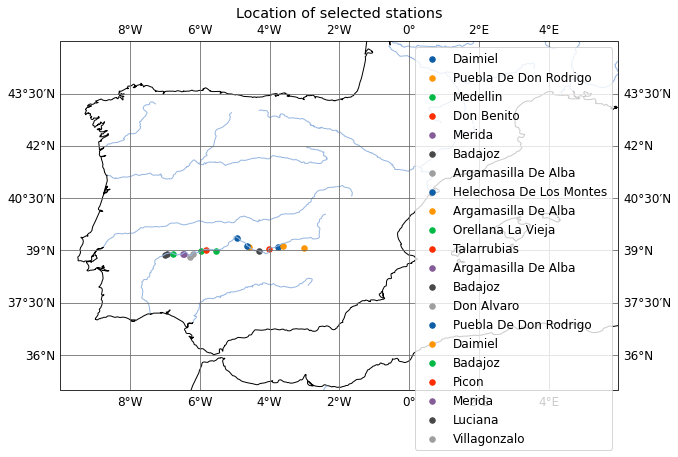

In [ ]:
# plot station location on a map with rivers and coastlines
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cartopy.feature.RIVERS)
ax.set_extent([-10, 6, 35, 45])
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
for key, coordinates in stations_merit_csv.items():
    if ((coordinates['river'] == 'Guadiana')):
        plt.scatter(coordinates['lon_grid'], coordinates['lat_grid'], s=30, label=coordinates['name'], marker='o')
plt.title('Location of selected stations')
plt.legend()

In [ ]:
# remove years not between 2003 and 2012
# stations = stations.where((stations['time.year'] >= 2003), drop=True)
# stations = stations.where((stations['time.year'] <= 2012), drop=True)

6299001:{'name': 'Ciudad Real', 'river': ' Guadiana', 'lat_grid': 39.05833435058594, 'lon_grid': -3.991659641265869, 'last_record': '2002-02-15'},


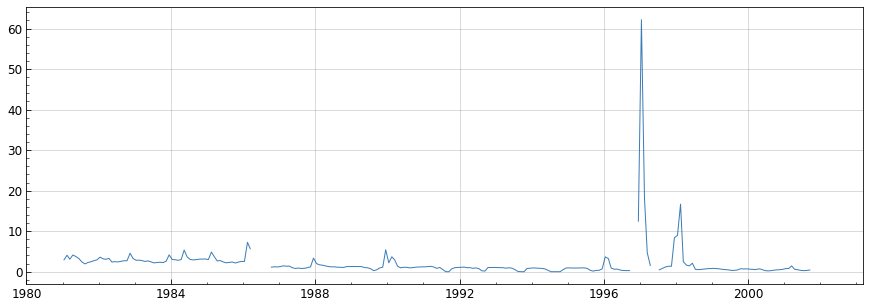

In [ ]:
#plot time series of mergedhydro for a selected station
station_id = 6299001
mask = (stations['number'] == station_id)
station = stations.sel(stations=mask)
station = station.where((stations['time.year'] >= 1981), drop=True)
plt.figure(figsize=(15, 5))
plt.plot(station['time'], station['mergedhydro'], label='GRDC')
#print dict row for the selected station
print (str(station_id) + ':' + str(stations_merit_csv[station_id]) + ',')

In [ ]:
# create a dict with id name, lon lat for a subset of stations
stations_merit = {
    6298992: {'name': 'Albarreal De Tajo',  'river': 'Tajo', 'lon_grid':-4.17499303817749, 'lat_grid':39.891666412353516, 'year_min':1982, 'year_max':2010 },
    6298249: {'name': 'Zaragoza',  'river': 'Ebro', 'lon_grid':-0.8749926686286926, 'lat_grid':41.65833282470703, 'year_min':1982, 'year_max':2010},
    6298481: {'name': 'San Miguel del Pino', 'river': 'Duero', 'lon_grid':-4.92499303817749, 'lat_grid':41.508331298828125, 'year_min':1982, 'year_max':2010},
    # 6298564: {'name': 'Villanueva de Azoague', 'lon_grid':-5.641659736633301, 'lat_grid':41.974998474121094, 'year_min':1982, 'year_max':2010},
    # 6299121:{'name': 'Orellana La Vieja', 'river': ' Guadiana', 'lat_grid': 38.99166488647461, 'lon_grid': -5.541659832000732, 'last_record': '2013-09-15'},
    6298259:{'name': 'Badajoz', 'river': 'Guadiana', 'lat_grid': 38.85833358764648, 'lon_grid': -7.008326530456543, 'last_record': '2013-09-15', 'year_min':1996, 'year_max':2010},
    # 6298071:{'name': 'Constantina', 'river': ' Guadalquivir', 'lat_grid': 37.77499771118164, 'lon_grid': -5.691659450531006, 'last_record': '2013-09-15', 'year_min':1994, 'year_max':2009},
    # 6299029:{'name': 'Santiago-Pontones', 'river': ' Guadalquivir', 'lat_grid': 38.17499923706055, 'lon_grid': -2.791659355163574, 'last_record': '2013-09-15'},
    # # 6298149:{'name': 'Lucena', 'river': ' Guadalquivir', 'lat_grid': 37.29166412353516, 'lon_grid': -4.67499303817749, 'last_record': '2009-04-15'},
    # # 6298597:{'name': 'Guejar Sierra', 'river': ' Guadalquivir', 'lat_grid': 37.15833282470703, 'lon_grid': -3.474992752075196, 'last_record': '2012-09-15'},
    # 6298606:{'name': 'Pozo Alcon', 'river': ' Guadalquivir', 'lat_grid': 37.758331298828125, 'lon_grid': -2.9083261489868164, 'last_record': '2013-09-15'},
    # # 6298731:{'name': 'Valdepenas De Jaen', 'river': ' Guadalquivir', 'lat_grid': 37.625, 'lon_grid': -3.7249927520751953, 'last_record': '2013-09-15'},
    # 6299108:{'name': 'Hornachuelos', 'river': ' Guadalquivir', 'lat_grid': 37.90833282470703, 'lon_grid': -5.20832633972168, 'last_record': '2013-09-15'},
    # 6299220:{'name': 'Villacarrillo', 'river': ' Guadalquivir', 'lat_grid': 38.04166412353516, 'lon_grid': -2.9583261013031006, 'last_record': '2013-09-15'},
}

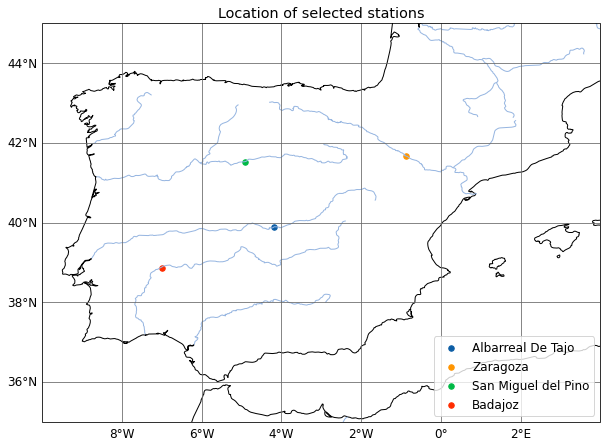

In [ ]:
# plot station location on a map with rivers and coastlines
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cartopy.feature.RIVERS)
ax.set_extent([-10, 4, 35, 45])
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
gl.ylocator = gl.ylocator = plt.MaxNLocator(5)
gl.right_labels = False
gl.top_labels = False
for key, coordinates in stations_merit.items():
    plt.scatter(coordinates['lon_grid'], coordinates['lat_grid'], s=30, label=coordinates['name'], marker='o')
plt.title('Location of selected stations')
#activate legend and put it in the bottom right corner
plt.legend(loc='lower right')

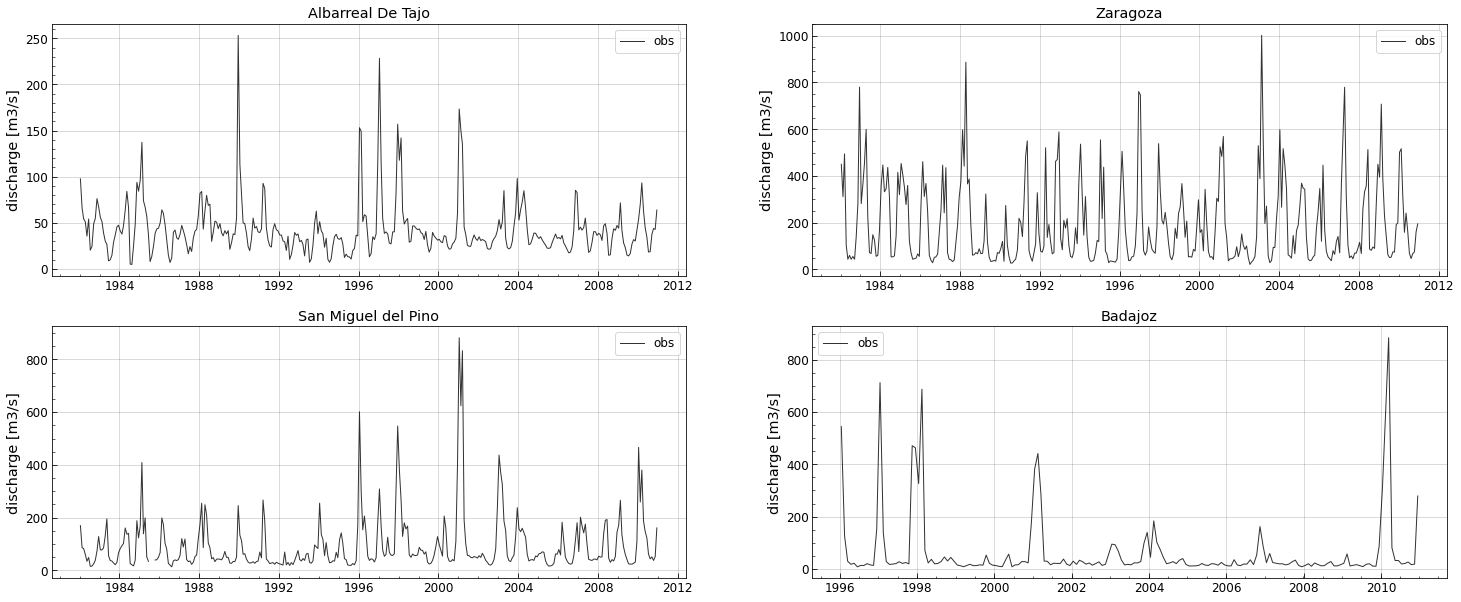

In [ ]:
# visualize time series for selected stations
fig, ax = plt.subplots(2, 2, figsize=(25, 10))
ax = ax.flatten()
for i, (key, coordinates) in enumerate(stations_merit.items()):
    mask = (stations['number'] == key)
    station = stations.sel(stations=mask)
    #remove years before 2003 and after 2012
    station = station.where((station['time.year'] >= coordinates['year_min']), drop=True)
    station = station.where((station['time.year'] <= coordinates['year_max']), drop=True)
    ax[i].plot(station['time'],station['mergedhydro'], label='obs', c='black')
    ax[i].set_title(coordinates['name'])
    ax[i].set_ylabel('discharge [m3/s]')
    ax[i].legend()

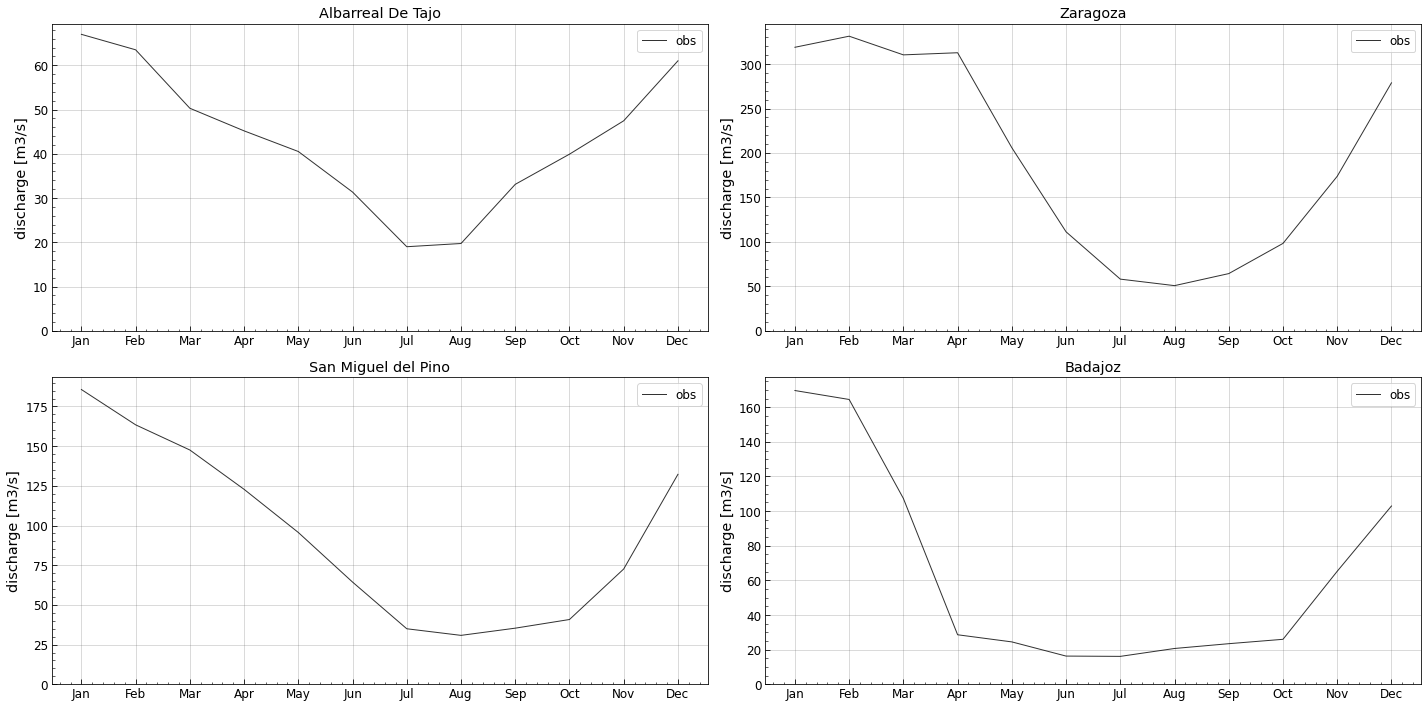

In [ ]:
# visualize seasonnal cycle for selected stations
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
for i, (key, coordinates) in enumerate(stations_merit.items()):
    mask = (stations['number'] == key)
    station = stations.sel(stations=mask)
    ax = ax.flatten()
    #remove years before 2003 and after 2012
    station = station.where((station['time.year'] >= coordinates['year_min']), drop=True)
    station = station.where((station['time.year'] <= coordinates['year_max']), drop=True)
    station = station.groupby('time.month').mean()
    ax[i].set_title(coordinates['name'])
    ax[i].plot(station['month'],station['mergedhydro'], label='obs', c='black')
    ax[i].set_ylabel('discharge [m3/s]')
    #set Y minimum to 0
    ax[i].set_ylim(bottom=0)
    #add months name to x-axis ticks
    months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    ax[i].set_xticks(np.arange(1,13))
    ax[i].set_xticklabels(months)
    ax[i].legend()
plt.tight_layout()

Text(0.5, 1.0, 'Station Badajoz on Guadiana (1996-2010)')

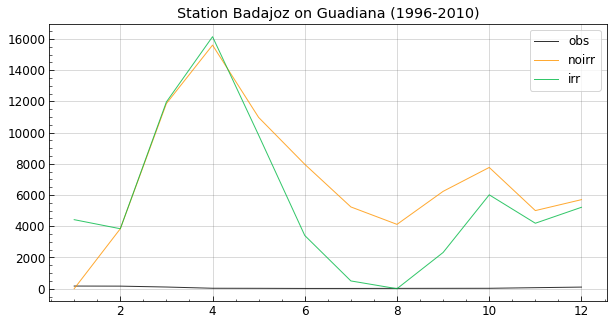

In [ ]:
# seasonnal cycle for one station
station_id=6298259
mask = (stations['number'] == station_id)
station = stations.sel(stations=mask)
ds1=natDIAG_R
ds2=natDIAG_Rirr
# ds3=natDIAG_Rirr06
lon = stations_merit[station_id]['lon_grid']
lat = stations_merit[station_id]['lat_grid']
name = stations_merit[station_id]['name']
year_min = stations_merit[station_id]['year_min']
year_max = stations_merit[station_id]['year_max']
min_date='{}-01-01'.format(year_min)
max_date='{}-12-31'.format(year_max)
river=stations_merit[station_id]['river']

plt.figure(figsize=(10, 5))

station = station.where((station['time.year'] >= year_min), drop=True)
station = station.where((station['time.year'] <= year_max), drop=True)
station = station.groupby('time.month').mean()
plt.plot(station['month'],station['mergedhydro'], label='obs', c='black')

var1=ds1['hydrographs']
var2=ds2['hydrographs']
# var3=ds3['hydrographs']
var1=var1.sel(time=slice(min_date, max_date))
var2=var2.sel(time=slice(min_date, max_date))
# var3=var3.sel(time=slice(min_date, max_date))
var1.sel(lon=lon, lat=lat, method='nearest').groupby('time.month').mean(dim='time').plot(label=ds1.attrs['name'])
var2.sel(lon=lon, lat=lat, method='nearest').groupby('time.month').mean(dim='time').plot(label=ds2.attrs['name'])
# var3.sel(lon=lon, lat=lat, method='nearest').groupby('time.month').mean(dim='time').plot(label=ds3.attrs['name'])

plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.title('Station {} on {} ({}-{})'.format(name, river, year_min, year_max))

# Time series

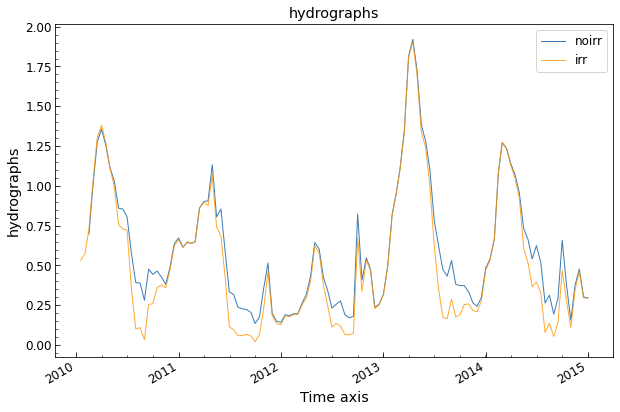

In [48]:
#Average time series
var='hydrographs'
ds1=natDIAG_R
ds2=natDIAG_Rirr
fig = plt.figure(figsize=(10, 6))
ax = plt.axes()
ax.grid()
ds1[var].mean(dim=['lon','lat']).plot(ax=ax, label=ds1.name)
ds2[var].mean(dim=['lon','lat']).plot(ax=ax, label=ds2.name)
plt.title(var)
plt.legend()

In [ ]:
#Time series
year_min=2003
year_max=2012
# # Guadalquivir
lon=-6.34
lat=36.79

var="hydrographs"
ds1=std
ds1 = ds1.where(ds1['time.year'] >= year_min, drop=True).where(ds1['time.year'] <= year_max, drop=True)
ds2=natDIAG_R
ds2 = ds2.where(ds2['time.year'] >= year_min, drop=True).where(ds2['time.year'] <= year_max, drop=True)
#plot the time series of hydrographs at the point (lon,lat)
fig = plt.figure(figsize=(10, 6))
ax = plt.axes()
ax.grid()
ax.set_ylabel('hydrographs')
# ds1[var].sel(lon=lon, lat=lat, method='nearest').plot(ax=ax, label=ds1.name)
ds2[var].sel(lon=lon, lat=lat, method='nearest').plot(ax=ax, label=ds2.name)
# ds2['runoff'].sel(lon=lon, lat=lat, method='nearest').plot(ax=ax, label='runoff')
plt.title('hydrographs at (' + str(lon) + ',' + str(lat) + '), m³/s')
plt.legend()

In [ ]:
#Time series
year_min=2003
year_max=2012
lon=-8.875
lat=41.86
ds1=natDIAG_R
ds1 = ds1.where(ds1['time.year'] >= year_min, drop=True).where(ds1['time.year'] <= year_max, drop=True)
#plot the time series of hydrographs at the point (lon,lat)
fig = plt.figure(figsize=(10, 6))
ax = plt.axes()
ax.grid()
ds1['runoff'].sel(lon=lon, lat=lat, method='nearest').plot(ax=ax, label='runoff',c='green')
ds1['drainage'].sel(lon=lon, lat=lat, method='nearest').plot(ax=ax, label='drainage',c='brown')
# ['rain'].sel(lon=lon, lat=lat, method='nearest').plot(ax=ax, label='rainfall',c='blue')
plt.title('Runoff and drainage at (' + str(lon) + ',' + str(lat) + '), mm/d')
plt.legend()

MemoryError: Unable to allocate 336. MiB for an array with shape (28, 1140, 1380) and data type float64

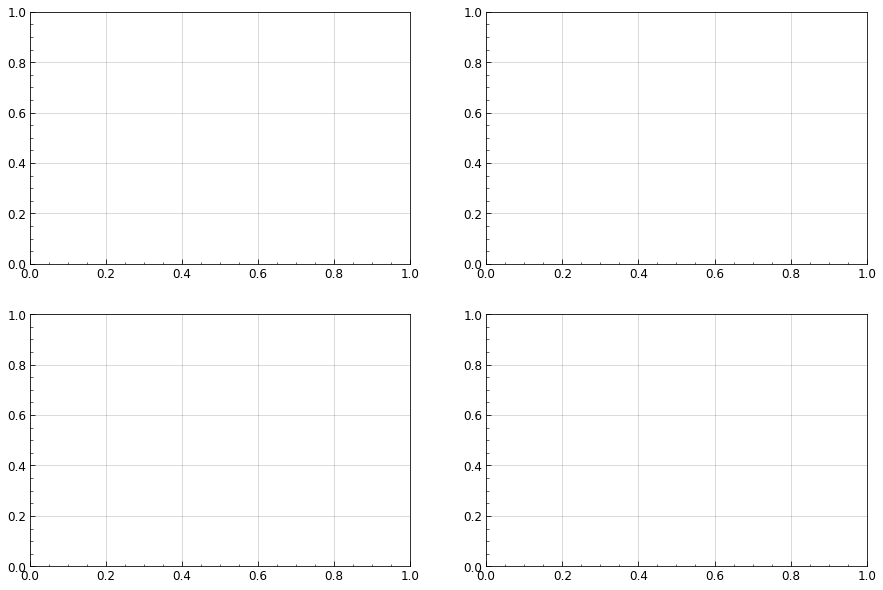

In [120]:
#cycle saisonnier pour x points de grille
ds1 = natDIAG_R
ds2 = natDIAG_Rirr
# ds3 = natDIAG_Rirr06

# Create subplots for each river in a 2x3 grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over rivers and plot hydrographs
for i, (sta_id, coordinates) in enumerate(stations_merit.items()):
    lon = coordinates['lon_grid']
    lat = coordinates['lat_grid']
    name = coordinates['name']
    # year_min = coordinates['year_min']
    # year_max = coordinates['year_max']
    year_min=2010
    year_max=2014
    river=coordinates['river']
    min_date='{}-01-01'.format(year_min)
    max_date='{}-12-31'.format(year_max)
    
    ax = axes[i]

    #Compute the annual cycle of hydrographs at the point (lon, lat) for each dataset
    var1=ds1['hydrographs']
    var2=ds2['hydrographs']
    # var3=ds3['hydrographs']
    var1=var1.sel(time=slice(min_date, max_date))
    var2=var2.sel(time=slice(min_date, max_date))
    # var3=var3.sel(time=slice(min_date, max_date))
    var1.sel(lon=lon, lat=lat, method='nearest').groupby('time.month').mean(dim='time').plot(ax=ax, label=ds1.attrs['name'])
    var2.sel(lon=lon, lat=lat, method='nearest').groupby('time.month').mean(dim='time').plot(ax=ax, label=ds2.attrs['name'])
    # var3.sel(lon=lon, lat=lat, method='nearest').groupby('time.month').mean(dim='time').plot(ax=ax, label=ds3.attrs['name'])
    
    # Compute the annual cycle of hydrographs at the point (lon, lat) for observation
    mask = (stations['number'] == sta_id)
    station = stations.sel(stations=mask)
    station = station.where((station['time.year'] >= year_min), drop=True)
    station = station.where((station['time.year'] <= year_max), drop=True)
    station=station.groupby('time.month').mean()
    ax.plot(station['month'],station['mergedhydro'], label='obs', c='black')
    
    #add months name to x-axis ticks
    months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    ax.set_xticks(np.arange(1,13))
    ax.set_xticklabels(months)
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.legend()
    ax.set_title('Station {}, on {} ({}-{})'.format(name, river, year_min, year_max))

# Remove any remaining empty subplots
for i in range(len(stations_merit), len(axes)):
    fig.delaxes(axes[i])

plt.suptitle("Seasonal cycle of river discharge (m³/s)")
plt.tight_layout()

HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 1:
  #000: H5Dio.c line 179 in H5Dread(): can't read data
    major: Dataset
    minor: Read failed
  #001: H5VLcallback.c line 2011 in H5VL_dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #002: H5VLcallback.c line 1978 in H5VL__dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #003: H5VLnative_dataset.c line 166 in H5VL__native_dataset_read(): can't read data
    major: Dataset
    minor: Read failed
  #004: H5Dio.c line 545 in H5D__read(): can't read data
    major: Dataset
    minor: Read failed
  #005: H5Dchunk.c line 2549 in H5D__chunk_read(): unable to read raw data chunk
    major: Low-level I/O
    minor: Read failed
  #006: H5Dchunk.c line 3904 in H5D__chunk_lock(): data pipeline read failed
    major: Dataset
    minor: Filter operation failed
  #007: H5Z.c line 1400 in H5Z_pipeline(): filter returned failure during read
    major: Data fil

MemoryError: Unable to allocate 360. MiB for an array with shape (30, 1140, 1380) and data type float64

ters
    minor: Read failed
  #008: H5Zdeflate.c line 129 in H5Z__filter_deflate(): memory allocation failed for deflate uncompression
    major: Resource unavailable
    minor: No space available for allocation


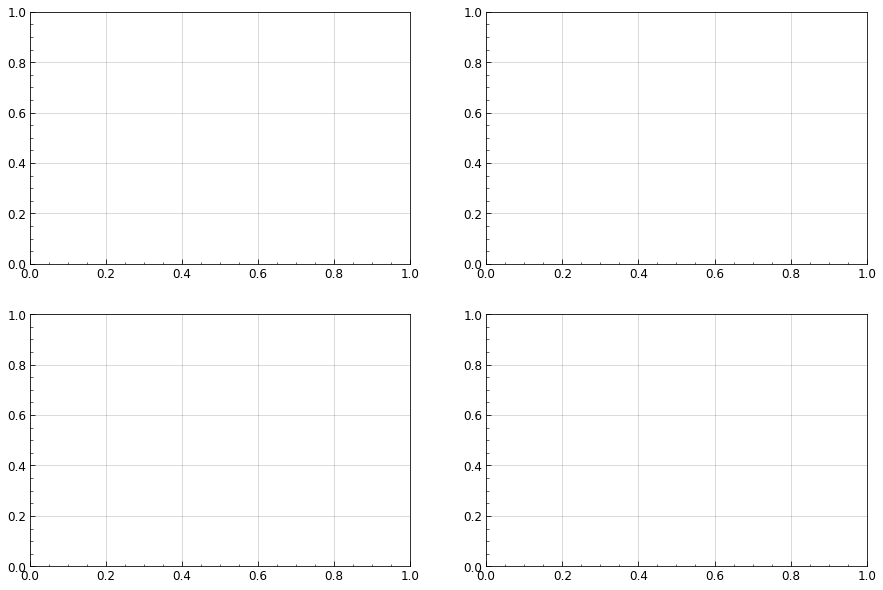

In [119]:
#Série temporelle pour x points de grille
ds1 = natDIAG_R
ds2 = natDIAG_Rirr

# Create subplots for each river in a 2x3 grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over rivers and plot hydrographs
for i, (sta_id, coordinates) in enumerate(stations_merit.items()):
    lon = coordinates['lon_grid']
    lat = coordinates['lat_grid']
    name = coordinates['name']
    # year_min = coordinates['year_min']
    # year_max = coordinates['year_max']
    year_min=2010
    year_max=2013
    river=coordinates['river']
    min_date='{}-01-01'.format(year_min)
    max_date='{}-12-31'.format(year_max)
    
    ax = axes[i]

    #Compute the annual cycle of hydrographs at the point (lon, lat) for each dataset
    var1=ds1['hydrographs']
    var2=ds2['hydrographs']
    var1=var1.sel(time=slice(min_date, max_date))
    var2=var2.sel(time=slice(min_date, max_date))
    var1.sel(lon=lon, lat=lat, method='nearest').plot(ax=ax, label=ds1.attrs['name'])
    var2.sel(lon=lon, lat=lat, method='nearest').plot(ax=ax, label=ds2.attrs['name'])
    
    # Compute the annual cycle of hydrographs at the point (lon, lat) for observation
    mask = (stations['number'] == sta_id)
    station = stations.sel(stations=mask)
    station = station.where((station['time.year'] >= year_min), drop=True)
    station = station.where((station['time.year'] <= year_max), drop=True)
    ax.plot(station['time'],station['mergedhydro'], label='obs', c='black')
    
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.legend()
    ax.set_title('Station {}, on {} ({}-{})'.format(name, river, year_min, year_max))

plt.suptitle("River discharge (m³/s)")
plt.tight_layout()